In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

# Shit we gotta do:

### Estimation 

An evaluation of the report based on the Data Science Lifecycle (10 points, 2 points per component). The review should include at least one strong point and one suggestion for improvement for each of the following components in the project:

    Data collection and sampling
    Data cleaning
    Exploratory data analysis (including data wrangling and visualization)
    Data modeling (including feature engineering, selection of the model, and evaluation of the model’s performance)
    Inference (do the results from the model sufficiently support the conclusion within the report?)

# Data Sampling and Collection

## How were the data collected?

Give a quick write-up of the explanations that the data dictionaries for the data that we are using. 

For reference, we are using primarily pollinator 1 and the weather data sampled from 2011-2018

## Was there any potential bias introduced in the sampling process?

1. Biologist Fatigue 
2. Biologist Accuracy - The biologist who took these samples may have not been as well trained as others 
3. According to (**RESEARCH THAT ZACH MENTIONS**) some biologists will not know the plant or pollinator species off-hand and may increase the likelihood of misclassifying them. 

# Data Dictionary 

## `CLOUDS`

1. S = Sunny
2. SH = Shade
3. PC = Partly Cloudy
4. C = Cloudy

## `WIND`

1. BR = Breezy
2. ST = Still

## `MINUTE`

On a given sample date, an observer will be there for 15 minutes, which is why the numbers in this variable are from 1-15

## `PLOT_ID`

Plot ID for a plot in a given meadow. There are 180 individual plots.

## `PLOT`

Plots in a given meadow. They are numbered 1-10. There are 180 individual plots.

## `WATCH`

* Code	
    * Definition
* 0.5	
    * Phenological period 0.5 (The cone peak complex was sampled an extra time in 2011 during the first week 0.5, 1.5 were used)	
* 1	
    * Phenological period 1	
* 1.5	
    * Phenological period 1.5 (The cone peak complex was sampled an extra time in 2011 during the first week 0.5, 1.5 were used)	
* 2	
    * Phenological period 2	
* 3	
    * Phenological period 3	
* 4	
    * Phenological period 4	
* 5	
    * Phenological period 5	
* 6	
    * Phenological period 6	
* 7	
    * Phenological period 7

## Observations 

1. Dataset covers years 2011-2018
2. Plant Pollinators 1 is the number of pollinator interactions with flowers in the area. 
3. 

# Data Cleaning

## What type of data are you currently exploring?

We are currently exploring the `plant_pollinator_diversity_set1.csv` which contains ecological data collected from a long-term observation study from 2011 to 2018 that focuses on plant-pollinator interaction and its impact on local biodiversity. We joined this data with weather station data that collected average temperature and precipitation from three weather stations that surround the forest (H. J. Andrews Experimental Forest)

## What is the granularity of the data?

VERY. Just kidding. Each observation is a "minute" in a 15-minute time window where a researcher is collecting the total number of pollinator-plant interactions within a particular plot of land, within a meadow within a complex (general region in the forest).  

## What does the distribution of the data look like? 
### Are there any outliers? 
### Are there any missing or invalid entries?

In [4]:
df = pd.read_csv('data/plant_pollinator_diversity_set1.csv')
#plant_pollinator_2 = pd.read_csv('data/plant_pollinator_diversity_set2.csv')

In [6]:
df.head()

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,...,PPI_STATUS,NO_INT,PLTSP_CODE,PLTSP_NAME,VISSP_CODE,VISSP_NAME,VISSP_TYPE,REF_NO,VISSP_NO,QC_NOTES
0,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ACHIMILL,Achillea millefolium,EPICPUNC,Epicauta puncticollis,predaceous beetle,NaN,1,NaN
1,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,1.0,ACHIMILL,Achillea millefolium,EVYLS5M,Evylaeus sp 5M,halictine bee,NaN,1,NaN
2,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,1,NaN
3,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,2,NaN
4,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,TRICORNA,Trichodes ornatus,bee-parasitic beetle,NaN,1,NaN


In [5]:
#both datasets cover observations from 2011 to 2018
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74131 entries, 0 to 74130
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DBCODE      74131 non-null  object 
 1   ENTITY      74131 non-null  int64  
 2   COMPLEX     74131 non-null  object 
 3   MEADOW      74131 non-null  object 
 4   PLOT_ID     74131 non-null  object 
 5   YEAR        74131 non-null  int64  
 6   SAMPLEDATE  74131 non-null  object 
 7   WATCH       74131 non-null  float64
 8   OBSERVER    62345 non-null  object 
 9   PLOT        74131 non-null  int64  
 10  START_TIME  63281 non-null  float64
 11  END_TIME    7501 non-null   float64
 12  MINUTE      73978 non-null  float64
 13  CLOUDS      73737 non-null  object 
 14  WIND        73860 non-null  object 
 15  TEMP        46439 non-null  float64
 16  PPI_STATUS  74131 non-null  int64  
 17  NO_INT      74078 non-null  float64
 18  PLTSP_CODE  60271 non-null  object 
 19  PLTSP_NAME  60271 non-nul

#### Find outliers in the data 

#### Missing or invalid entries 

There are a total of 74,131 observations in our data. The highest number of missing values comes from the `QC_NOTES` column, which has 68743 null values. The following table outlines which variables have missing values and how important they are to our project's mission.

Column Name  | # of Missing Entries| Importance 
------------- | -------------| -------------|
OBSERVER  | 11,786| Medium |
START_TIME  | 10,850| Low|
END_TIME | 66630 | Low|
MINUTE | 153 | Low |
CLOUDS | 394 | Medium | 
WIND | 271 | Medium |
TEMP | 27692 | High | 
NO_INT | 53 | Medium| 
PLTSP_CODE | 13860 | Low|
PLTSP_NAME | 13860 | Low|
VISSP_CODE | 13860 | Low|
VISSP_NAME | 13860 | Low|
VISSP_TYPE | 35537 | Low| 
REF_NO | 58956 | Low | 
QC_NOTES | 68743 | Low|

### Why `PLTSP_CODE`, `PLTSP_NAME`, `VISSP_CODE`, `VISSP_NAME`, and `VISSP_TYPE` are missing data

Each one of these variables describe the type of plant (PLTSP = Plant species) and insect/pollinator (Visitor Species) that were seen in one of the interactions. 

One peculiar instance is that the `VISSP_NO` variable all came out to 1 even though there are no plant species or visitor species identified. We are going to remove these data from the dataset to remove any outliers, however, this takes out a very large chunk from out sample. Not only is the total removed come out to being ~19% of our data, but it removes over 60% of the observations from 2014, 2015, and 25% of the data from 2016 as seen in the histogram below. 


However, while we are not given any of the species information for any of the plants or visitors, we believe that we should keep the data because it indicates that there **was** a pollinator-plant interaction. Our assumption here is that the researcher that went out on this particular day did not know the species of the bug or the plant and simply made a count without being able to dictate what species it was. However, this is still a count of an interaction.

<AxesSubplot:>

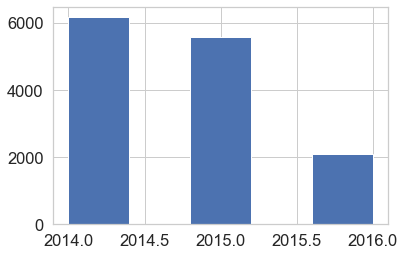

In [48]:
# show the observations that will be gone from each year. 
df.loc[df['PLTSP_CODE'].isna(),'year'].hist(bins=5)

In [54]:
df['CLOUDS'].value_counts()

S     63236
PC     4344
SH     4036
C      2121
Name: CLOUDS, dtype: int64

In [ ]:
df['CLOUDS'].replace({'S':'sunny','PC':'p_cloudy','SH':'shade','C':'cloudy'})

In [52]:
df['PLOT_ID'].unique()

array(['BGD01', 'BGD02', 'BGD03', 'BGD04', 'BGD05', 'BGD06', 'BGD07',
       'BGD08', 'BGD09', 'BGD10', 'BGH01', 'BGH02', 'BGH03', 'BGH04',
       'BGH05', 'BGH06', 'BGH07', 'BGH08', 'BGH09', 'BGH10', 'BGS01',
       'BGS02', 'BGS03', 'BGS04', 'BGS05', 'BGS06', 'BGS07', 'BGS08',
       'BGS09', 'BGS10', 'CNE01', 'CNE02', 'CNE03', 'CNE04', 'CNE05',
       'CNE06', 'CNE07', 'CNE08', 'CNE09', 'CNE10', 'CNM01', 'CNM02',
       'CNM03', 'CNM04', 'CNM05', 'CNM06', 'CNM07', 'CNM08', 'CNM09',
       'CNM10', 'CNT01', 'CNT02', 'CNT03', 'CNT04', 'CNT05', 'CNT06',
       'CNT07', 'CNT08', 'CNT09', 'CNT10', 'CPB01', 'CPB02', 'CPB03',
       'CPB04', 'CPB05', 'CPB06', 'CPB07', 'CPB08', 'CPB09', 'CPB10',
       'CPM01', 'CPM02', 'CPM03', 'CPM04', 'CPM05', 'CPM06', 'CPM07',
       'CPM08', 'CPM09', 'CPM10', 'CPR01', 'CPR02', 'CPR03', 'CPR04',
       'CPR05', 'CPR06', 'CPR07', 'CPR08', 'CPR09', 'CPR10', 'CPS01',
       'CPS02', 'CPS03', 'CPS04', 'CPS05', 'CPS06', 'CPS07', 'CPS08',
       'CPS09', 'CPS

In [34]:
df['DATETIME'] = pd.to_datetime(df['SAMPLEDATE'])

df['Date'] = pd.to_datetime(df['SAMPLEDATE'], format='%Y-%m-%d')

df['MY'] = df['DATETIME'].dt.to_period('M')
# Create a month and year variable 
df['month'] = df['DATETIME'].dt.month
df['year'] = df['DATETIME'].dt.year


TypeError: cannot convert the series to <class 'int'>

In [42]:
df['CLOUDS'].value_counts()

S     63236
PC     4344
SH     4036
C      2121
Name: CLOUDS, dtype: int64

In [20]:
df['temp_f'] = df['TEMP']* 1.8000 + 32.00

# Exploratory Data Analysis
## Is there any correlation between the variables you are interested in exploring?
## How would you cleanly and accurately visualize the relationship among variables?

# Data Modeling and Inferences

Please note that the following datasets have a data modeling requirement, i.e. you need to utilize at least 1 machine learning model we teach in this class in your project: 
* Topic 1 
    * Dataset A, 
    * Dataset C 
* Topic 2 - Dataset A 
* Topic 3 
    * Dataset A
    * Dataset B. 
    
For datasets not mentioned above, you are welcome to continue building machine learning model(s). Otherwise, we will be placing more emphasis on the inference part instead.

    Here are a few components your notebook must address:
        What type of machine learning problem are you investigating?
        What model do you plan on using and why?
        Does your model require hyperparameter tuning? If so, how do you approach it?
        How do you engineer the features for your model? What are the rationales behind selecting these features?
        How do you perform cross validation on your model?
        What loss metrics are you using to evaluate your model?
        From a bias-variance tradeoff standpoint, how do you assess the performance of your model? How do you check if it is overfitting?
        How would you improve your model based on the outcome?
        
# IDEAS: 

Potentially call out the biologists through a cluster analysis 

In [13]:
df[(df['Date'].dt.month==7) & (df['PLOT']==4)&(df['Date'].dt.year==2011)]['VISSP_NAME'].value_counts()

Bombus mixtus                       21
Chrysotoxum fasciatum               17
Eristalis hirtus                    14
Bombylius major                     14
Platycheirus stegnus                14
Muscoid genus 2                     11
Bombus bifarius                      7
Muscoid genus 1                      7
Apis mellifera                       6
Conophorus sp 3                      6
Muscoid genus 3                      5
Euphilotes enoptes                   5
Bombus melanopygus                   4
Eschatocrepis constrictus            4
Poecilanthrax sp 1                   3
Osmia sp 27                          3
Eupeodes volucris                    2
Anthrax sp X1                        2
Osmia sp 6M                          2
Syrphus ribesii                      2
Toxomerus occidentalis               1
Chrysidid sp 2                       1
Epicauta puncticollis                1
Calypte anna                         1
Osmia sp 23                          1
Bombus vosnesenskii      

In [78]:
# create the result table by grouping by year, then month, then plot of land
result = df[['year','month', 'COMPLEX', 'VISSP_NAME']].groupby(['year','month', 'COMPLEX']).count()
result = result.reset_index()
result.replace({'Bunchgrass':1,'Carpenter':2,'Cone':3,'Frissell':4,'Lookout':5},inplace=True)

<AxesSubplot:xlabel='temp_f', ylabel='NO_INT'>

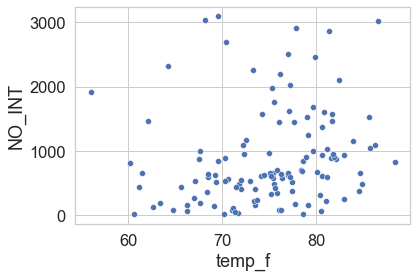

In [61]:
temp_count = df.groupby('SAMPLEDATE').agg({'NO_INT':np.sum,'temp_f':np.mean}).reset_index().dropna()
temp_count.describe()
temp_count = temp_count.loc[temp_count['NO_INT']<=3500]
sns.scatterplot(x=temp_count['temp_f'],y=temp_count['NO_INT'])

In [79]:
#result['PLOT'] = result['PLOT'].astype(str)

fig = px.bar(result, x="COMPLEX", y="VISSP_NAME",  barmode="group",color='COMPLEX',
             facet_row="month", facet_col="year",
             category_orders={"month": [6,7,8,9]}
            )
fig.update_traces()
fig.show()

In [21]:
df['temp_f'].describe()

count    46439.000000
mean        74.708943
std          8.392481
min         50.000000
25%         68.000000
50%         75.200000
75%         80.600000
max        111.200000
Name: temp_f, dtype: float64